In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#metric = "f1 score - model labels"
metric = "sufficiency"
type_of_rat = "fixed"

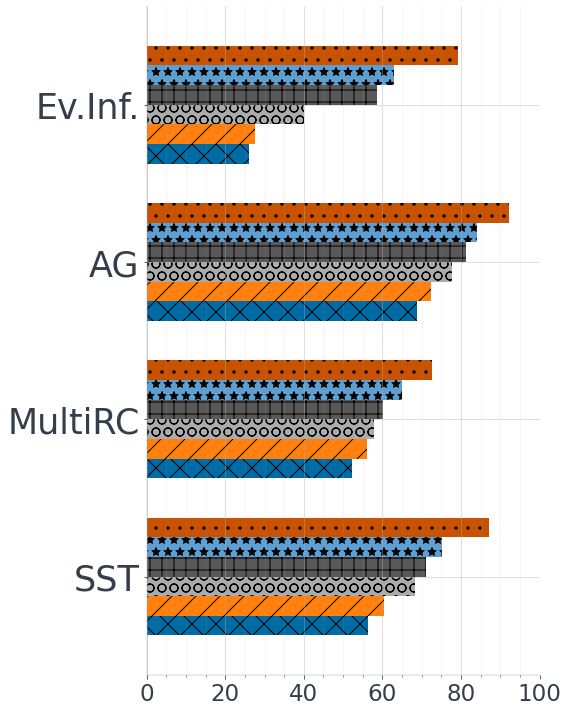

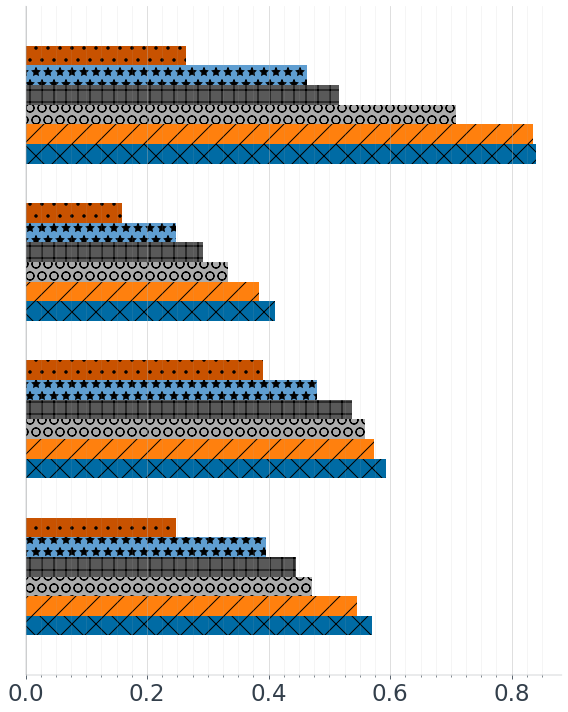

In [218]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


def plot_increasing_feat_(datasets : list = ["sst", "multirc", "agnews", "evinf"],
                            metrics_folder : str = "faithfulness_metrics",
                            rationale_type: str = "topk",
                            metric : str = "sufficiency",
                            var_or_fixed : str = "fixed",
                            plot_legend : bool = False,
                            y_label_at_metric : str = "f1 score - model labels"):


    assert metric in {"comprehensiveness", "sufficiency", "f1 score - model labels", "f1 score - actual labels"}, (
        """
        Must be one of the following metrics:
        * comprehensiveness
        * sufficiency
        * f1 score - model labels
        * f1 score - actual labels
        """
    )

    collective = {}

    for task_name in datasets:

        fname = os.path.join(
            metrics_folder,
            task_name,
            f"{rationale_type}-test-increasing-feature-scoring.json"
        )


        with open(fname, "r") as file : data = json.load(file) 

        if "f1" not in metric:

            collective[task_name] = [x[metric]["mean"] for x in data[var_or_fixed].values()]

        else:

            collective[task_name] = [x[metric] for x in data[var_or_fixed].values()]


    df = pd.DataFrame(collective)

    mapper = {
        "gradients" : "x∇x",
        "ig" : "IG",
        "deeplift" : "DeepLift",
        "attention" : "α",
        "scaled attention" : "α∇α",
        "lime" : "LIME"
    }

    nicer_tasknames = {
        "sst" : "SST",
        "evinf" : "Ev.Inf.",
        "multirc" : "MultiRC",
        "agnews" : "AG"
    }



    df.index = ["\n".join([mapper[y] for y in x.split("-")]) for x in data[var_or_fixed].keys()]
    df = df.rename(columns = nicer_tasknames)
  
    df = df.iloc[::-1]

    plt.style.use('tableau-colorblind10')
    # plt.style.use("seaborn-colorblind")
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.2
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    plt.rcParams["font.variant"] = "small-caps"

    fig, ax = plt.subplots(figsize = (8,10))

    plt.yticks(fontsize = 35, rotation = 45)

#     ax.set_xlabel(metric.capitalize(), fontsize = 35)
    
    df.T.plot.barh(ax = ax, legend=False, width=0.75)


    if metric != y_label_at_metric:

        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
        ax.set_yticklabels([])


    bars = ax.patches
    hatches = ''.join(h*len(df.T) for h in 'x/O+*.')

    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

    if "f1" not in metric:

        ax.set_xticks(np.arange(0.,df.max().max(), 0.2))
        plt.xticks(fontsize=23)
        ax.set_xticks(np.arange(0.,df.max().max()+0.025, 0.025), minor=True)


        if plot_legend:
            handles, labels = ax.get_legend_handles_labels()
            legend = plt.legend( 
                handles[::-1], labels[::-1],
                loc = (1,0), 
                fontsize = 20, 
                fancybox = True, 
                framealpha = 0.4,
                labelspacing = 1,
                ncol=2,
                columnspacing=0.1,
                frameon=False
            )

    else:

        ax.set_xticks(np.arange(0,100+20,20))
        plt.xticks(fontsize=23)
        ax.set_xticks(np.arange(0,100,5), minor=True)

        if plot_legend:
            handles, labels = ax.get_legend_handles_labels()
            legend = plt.legend( 
                handles[::-1], labels[::-1],
                loc = (1,0), 
                fontsize = 20, 
                fancybox = True, 
                framealpha = 0.4,
                ncol=2,
                frameon=False
            )
    
    plt.grid(which='minor', alpha=0.15)
    plt.grid(which='major', alpha=0.5)
    plt.tight_layout()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if plot_legend:
        
        export_legend(legend, filename = "graphs_and_tables/increasing-set-of-feature_scoring/legend.png")
    
    plt.show()
    os.makedirs("graphs_and_tables/increasing-set-of-feature_scoring/", exist_ok = True)
    
    fig.savefig(f"graphs_and_tables/increasing-set-of-feature_scoring/{metric}-increasing-feat-attr.png", dpi = 300)#, bbox_inches="tight")

    plt.close()

    return

# plot_increasing_feat_(metric = "sufficiency", plot_legend = True)
plot_increasing_feat_(metric = "f1 score - model labels")
plot_increasing_feat_(metric = "comprehensiveness")

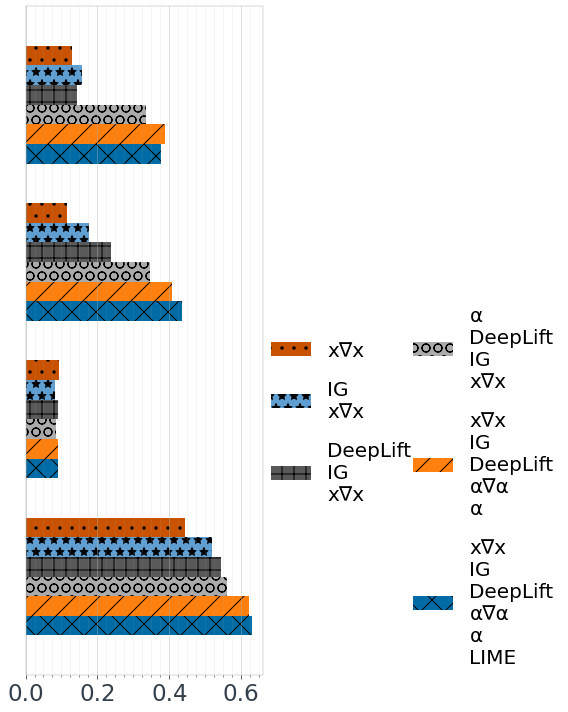

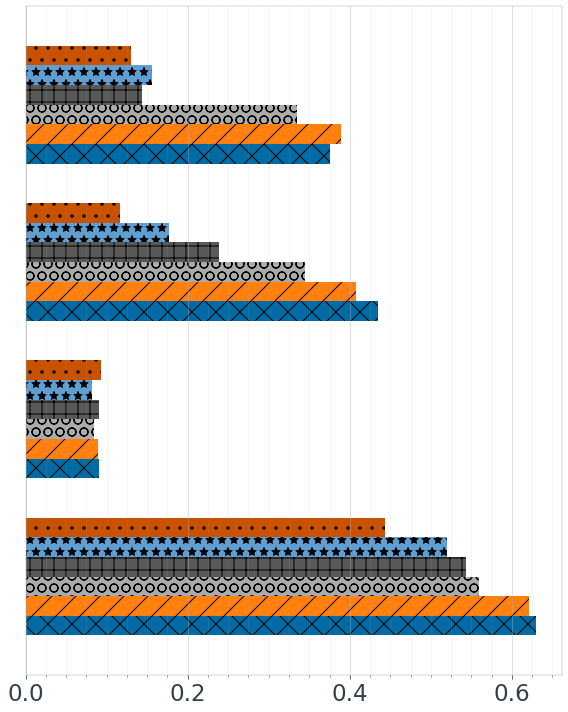

In [216]:
plot_increasing_feat_(metric = "sufficiency", plot_legend = True)
plot_increasing_feat_(metric = "sufficiency")